We will be using Linear Regression to advise a (fake) Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

We'll first explore this data, before using Linear Regression to study the correlations between the different factors and how they affect the how much the customer spends.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats as mystats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Ecommerce Customers.csv')

In [3]:
df.describe()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


## Checking if our data Set is containing any null values 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
G=df.iloc[:,3:7]
C=df.iloc[:,3:8]

# Correlation between columns

<AxesSubplot:>

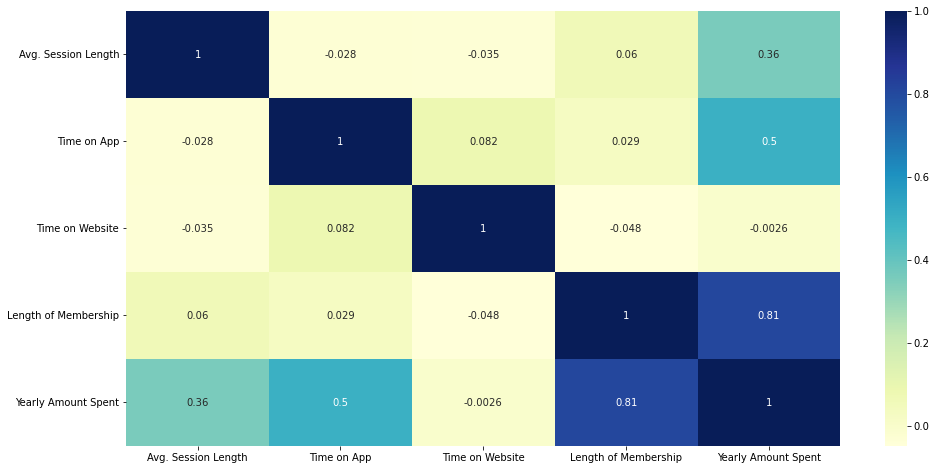

In [7]:
plt.figure(figsize=(16,8))
sns.heatmap(C.corr(), cmap="YlGnBu", annot=True)


In [8]:
#As we an infer fro the heatmap that yearly amount is highly corellated length of membership
#As Avg Session lenght and Yearly Amount Spent is also correlated with Yearly Amount

## Correlation between the output and other features.


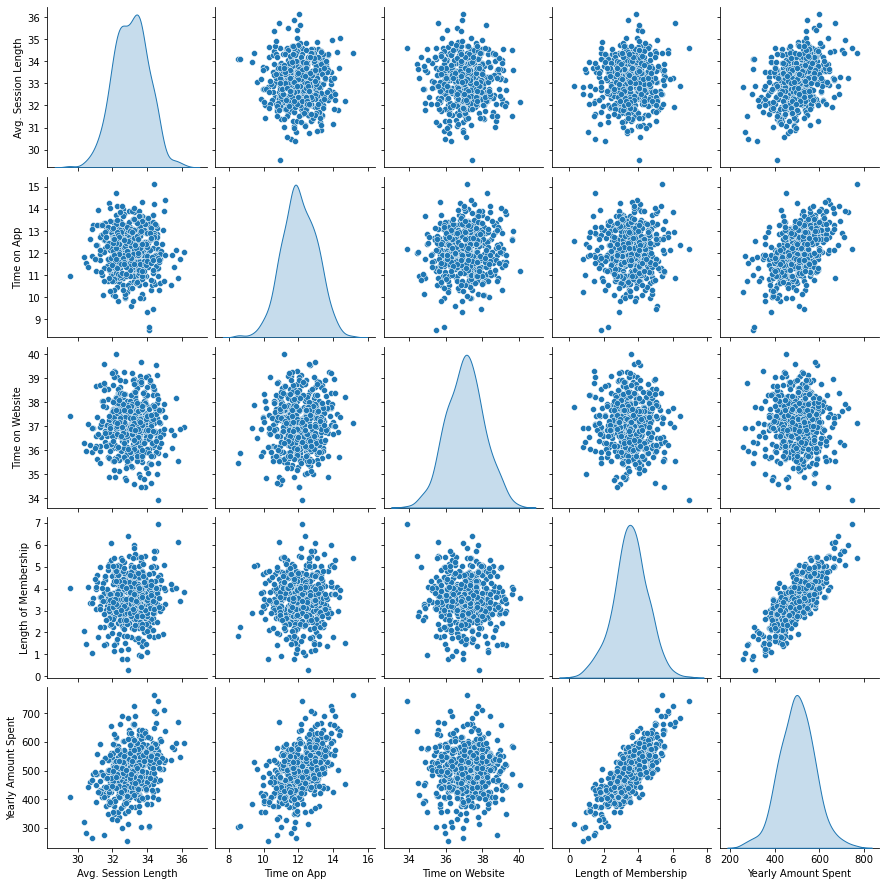

In [9]:
sns.pairplot(df,diag_kind = 'kde')

In [10]:
#As we can infer fromn this pairplot that length of membership is positively correlated with yearly amount spent
#same as Time_on_App is also positively correlated with yearly amount spend
#And we can see most of the data is normally distibuted

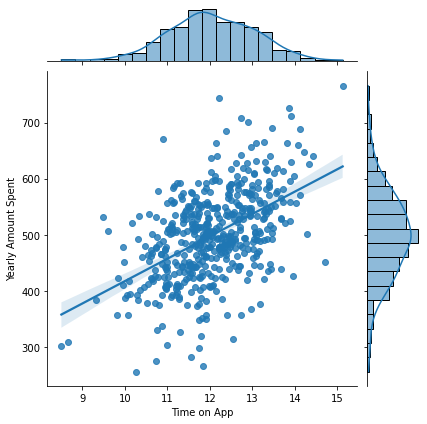

>> As we an see there is a posiitive corellation between inreasing time on app and yerly amount


In [11]:
sns.jointplot(x=df.iloc[:,4],y=df.iloc[:,-1],kind='reg')
plt.show()
print('>> As we an see there is a posiitive corellation between inreasing time on app and yerly amount')


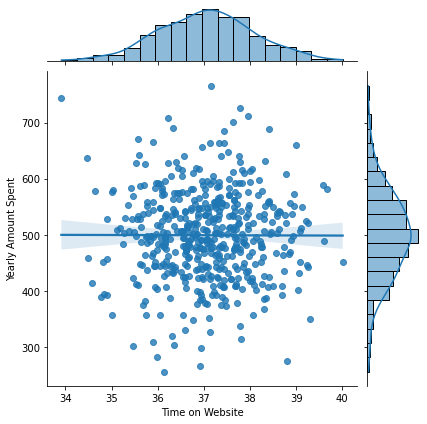

In [12]:
sns.jointplot(x=df.iloc[:,5],y=df.iloc[:,-1],kind='reg')

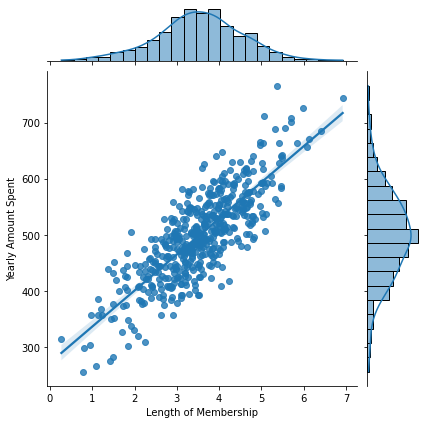

In [13]:
sns.jointplot(x=df.iloc[:,6],y=df.iloc[:,-1],kind='reg')

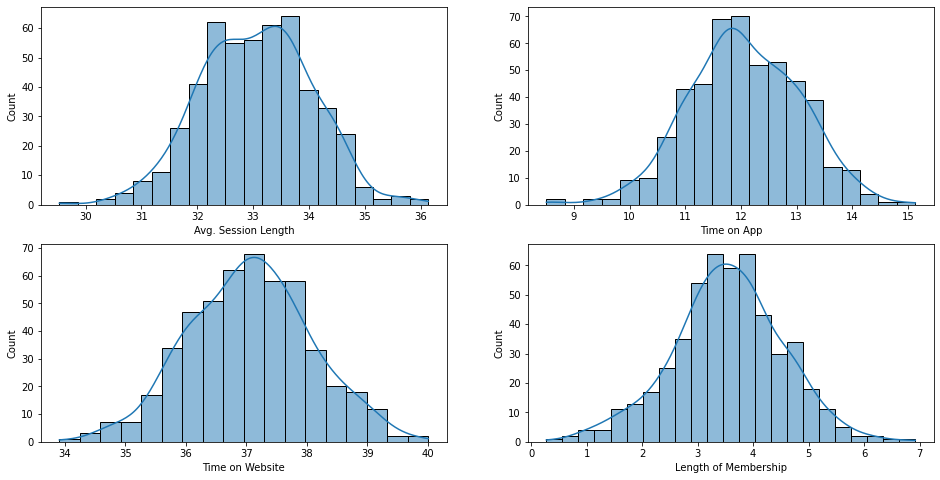

In [14]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df.iloc[:,3],kde=True)
plt.subplot(2,2,2)
sns.histplot(df.iloc[:,4],kde=True)
plt.subplot(2,2,3)
sns.histplot(df.iloc[:,5],kde=True)
plt.subplot(2,2,4)
sns.histplot(df.iloc[:,6],kde=True)
plt.show()


In [15]:
#as we can see there is a normal distibution in every column  

<AxesSubplot:xlabel='Time on App', ylabel='Yearly Amount Spent'>

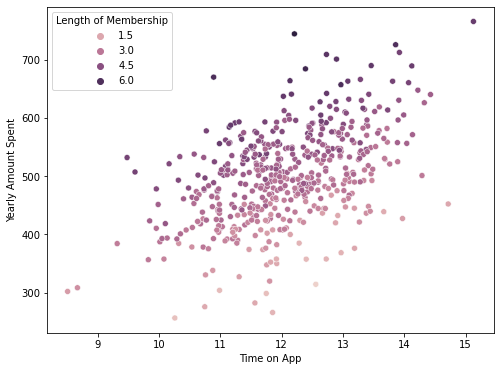

In [16]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=df['Time on App'],y=df['Yearly Amount Spent'],hue=df['Length of Membership'])

## Outlier Detection and Treatment

<AxesSubplot:>

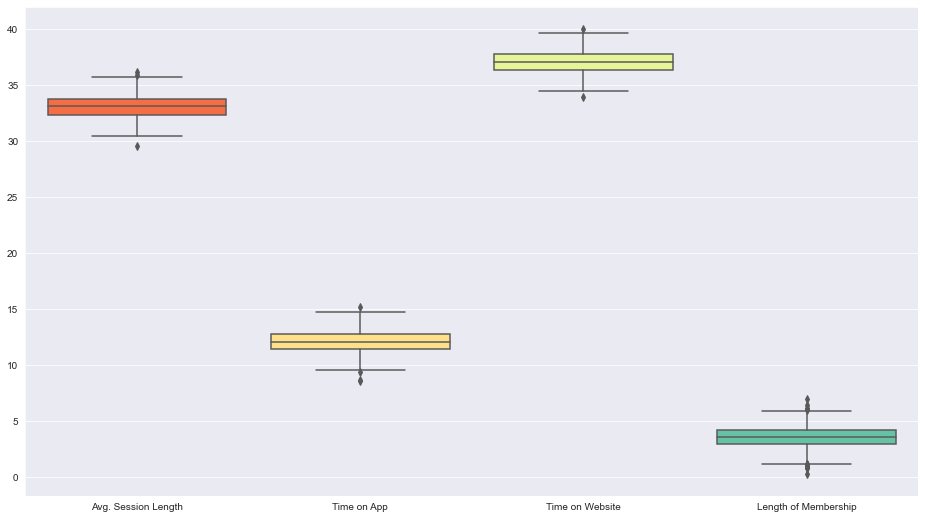

In [17]:
plt.figure(figsize=(16,9))
sns.set_style("darkgrid")
sns.boxplot(data=G,orient='V',color=None, palette="Spectral", saturation=1.75, width=0.8)

In [18]:
li=[]
def outlier(df):
    

    q1=np.percentile(df,25)
    q3=np.percentile(df,75)

    #if q1>=5:
        #q1=int(q1+1)
    #elif q3>=5:
        #q3=int(q3+1)
    
    IQR=(q3-q1)

    lower_fence=q1-(1.5*IQR)
    Higher_fence=q3+(1.5*IQR)
    
    print('|IQR: %.2f          |'% IQR)
    print('|lower_fence:%.2f  |'% lower_fence)
    print('|median:%.2f       |'% np.median(df))
    print('|Higher_fence:%.2f |'% Higher_fence)
    O=[i for i in df if(i>Higher_fence) or (i<lower_fence)]
    N=[x for x in df if x >= lower_fence and x <= Higher_fence]
    li.append(N)
    print(" outliers             :",O) 
    
print("Avg_Session_Length")
outlier([i for i in df.iloc[:,3]])
print("\nTime_on_App")
outlier([i for i in df.iloc[:,4]])
print("\nTime_on_Website")
outlier([i for i in df.iloc[:,5]])
print('\nLength_of_Membership') 
outlier([i for i in df.iloc[:,6]])
    


Avg_Session_Length
|IQR: 1.37          |
|lower_fence:30.29  |
|median:33.08       |
|Higher_fence:35.77 |
 outliers             : [29.532428967057943, 36.13966248879052, 35.86023651335309]

Time_on_App
|IQR: 1.37          |
|lower_fence:9.34  |
|median:11.98       |
|Higher_fence:14.80 |
 outliers             : [15.126994288792469, 8.508152176032603, 9.316289204373824, 8.668349517101323]

Time_on_Website
|IQR: 1.37          |
|lower_fence:34.30  |
|median:37.07       |
|Higher_fence:39.77 |
 outliers             : [40.005181638101895, 33.91384724758464]

Length_of_Membership
|IQR: 1.20          |
|lower_fence:1.14  |
|median:3.53       |
|Higher_fence:5.92 |
 outliers             : [5.97676812602, 6.401228837806773, 6.076653638440144, 6.922689335035807, 0.9686221157417688, 0.8015157200042076, 0.7895199078816915, 1.0845853030221226, 1.1304769604319769, 6.115198945760052, 0.9364975973183264, 0.2699010899842742]


In [19]:
#from matplotlib.cbook import boxplot_stats
#boxplot_stats(df["Time on Website"], 1.5)

In [20]:
Avg_Session_Length=[34.49726772511229, 31.92627202636016, 33.000914755642675, 34.30555662975554, 33.33067252364639, 33.87103787934198, 32.02159550138701, 32.739142938380326, 33.98777289568564, 31.936548618448917, 33.99257277495374, 33.87936082480498, 33.19033404372265, 32.38797585315387, 30.737720372628186, 32.12538689728784, 32.33889932306719, 32.187812045932155, 32.61785606282345, 32.91278511115979, 33.50308725671972, 31.531604482572902, 32.903250973372074, 34.50755099852662, 33.02933195350689, 33.54123131310037, 32.33598963740772, 33.11020505771776, 33.10543794246846, 33.24190043446127, 33.46105629551836, 32.175501237949376, 32.72836000313375, 32.82030994541536, 33.61603789276768, 31.72165236050904, 32.8653271748764, 32.74936818112046, 32.56723048027511, 32.07054622092545, 33.01954798572344, 33.79203907501622, 32.89398062181101, 32.04448612744043, 34.555767994657494, 34.56455770619167, 32.726784597863976, 33.117218732994786, 31.66104982274608, 33.25633546983111, 33.90022441401576, 34.18777482695728, 33.76206923913139, 34.390163664343326, 33.92529660119954, 32.68822929602445, 34.3018702154015, 32.843930222655175, 33.75499472831927, 33.879784289702826, 33.07653560709715, 32.22729913636721, 32.789772618310714, 32.77260992960089, 34.374258045247466, 33.0787172146689, 32.80522040097184, 32.43075793005128, 32.179099972602344, 33.15417578832186, 34.33589583979252, 32.38625185558597, 32.80869759268502, 33.87974496798125, 32.04983939045731, 33.55520742143224, 33.14207932732039, 32.59718265981362, 33.167136876950536, 31.514737857801983, 34.59402114954151, 33.50136982210362, 32.40237101796123, 34.65548567957987, 31.809300316679188, 33.877779300122526, 34.447871436480774, 31.956300560523367, 32.6055836415705, 32.49144660312287, 33.616018552595435, 33.47160052695171, 33.71065305912268, 32.19772379742183, 32.46121244511541, 33.790387206952126, 34.18382052058911, 32.288666909138946, 33.82635200907213, 32.49839307472945, 31.88540629991176, 32.425697279750864, 33.43782956230187, 31.3895854806644, 33.46869994900622, 32.291756100263015, 32.0637746203137, 33.15569970295208, 33.35687434475742, 31.85307480174657, 32.01230076824544, 32.388451625505326, 32.65318145878372, 32.93133644189654, 33.235606500693855, 33.92579489547876, 33.05926409135838, 32.401731827354666, 33.88994100692418, 34.56938121869345, 33.70160519868888, 33.26833021768797, 31.358477192437007, 33.01479221522831, 31.57613197132227, 32.657268594778124, 34.709323296131586, 34.5366591798774, 32.771715009701, 33.700400456822415, 32.43977025334846, 34.31216699740784, 32.45517628513712, 33.540976791782235, 33.358398281424215, 32.686129256115166, 34.558294609144475, 33.5477479443078, 31.954903856634843, 31.066218161637597, 31.851253128608366, 32.609282635640405, 32.11511906601424, 33.924624809512075, 33.477190403003306, 32.116400120928155, 32.25590120444978, 32.69239221858063, 32.38473265900513, 34.3387293850918, 32.88710464561531, 32.51021799444433, 31.945395748344524, 32.44952156114242, 32.29464154956504, 34.60331111938746, 33.5985203185533, 34.56868084571511, 32.83810016055479, 33.50370517913956, 33.30188161463884, 30.879484344127498, 33.15425475700075, 32.04780097886789, 33.63080076787103, 34.04663802802127, 33.644177000440536, 32.65462160732388, 33.42874704259606, 31.86483254809873, 34.48238804881123, 32.529768731474434, 33.432231396262715, 33.30857161628053, 32.33263706834172, 34.71345123397026, 32.635877998189926, 33.07570303157222, 32.23014911593311, 34.142863372870714, 32.4971984614607, 33.12239998431699, 33.088529366211525, 32.53379686092211, 32.48426048276214, 32.5434591695977, 32.28312306113335, 32.200798643965314, 34.71331650656199, 32.71251232693568, 33.69489765096749, 31.57020082932026, 33.45947684896434, 31.820998201672072, 32.73322416398153, 32.40714829999668, 33.506092281309364, 30.836432674773427, 34.87849495417028, 34.007211972221654, 31.525752416968214, 31.04722213948752, 34.59577669439264, 34.96760988717724, 32.29524762622046, 33.324240521849696, 32.903454333014224, 32.55949313011333, 31.76561882104241, 34.08164619679617, 33.304431285296005, 34.33075044367848, 32.07894757956938, 33.60579899891236, 32.74515048083576, 32.12236479579778, 32.53082944110282, 31.736635686050285, 34.11756669418932, 33.63662445812838, 34.33486453305801, 34.814983943728855, 34.642669758092204, 32.83694076702139, 32.29964716350497, 31.94801742116136, 32.72731919612472, 33.94624061993669, 32.35147815076609, 34.173752023676585, 32.97518182625784, 32.00475302036483, 34.19705969450868, 33.177204666060376, 32.69323953887129, 31.625360134830608, 31.260646869879523, 31.720769900287312, 32.922610758349414, 32.68624509039022, 34.05094675856064, 32.454552537551066, 31.28344747605816, 32.98002919845364, 31.909626827522736, 34.40240964824356, 32.95976431107423, 33.780156763295054, 32.6729435250038, 32.72852076313786, 33.40992258786484, 31.72420252384518, 32.711119299295326, 33.1366552476793, 34.37939438496412, 35.530904145898624, 33.24726795047748, 32.096108993845185, 35.039283064909725, 32.55052657442161, 32.58249357081853, 33.29698192462649, 33.108336148346, 33.902717794463925, 34.55528258670921, 33.73264839262621, 31.60051220030329, 34.318927438542204, 34.00648891839723, 33.54047906012372, 34.43642583784763, 33.55169913754013, 31.818616566769062, 32.36312129411639, 33.191570884444964, 32.19249882778649, 32.60790271932764, 32.26200310699493, 32.27184828087499, 33.79512493081247, 31.654809675692764, 33.07773079450243, 31.312349599444342, 32.87273861448019, 33.708153408093004, 33.908565031728365, 32.312909745943095, 34.394326648449855, 32.42330472721988, 33.539396346976595, 33.37401692609311, 33.79475594486519, 33.7709000976483, 31.309192640891823, 33.612563354981084, 33.39826012958678, 33.622591840455804, 30.4925366965402, 31.90485713101361, 33.0264203526517, 32.975192902963855, 30.81620064887634, 33.91401511732236, 33.30267220801569, 31.912075929200608, 32.40855895733437, 32.64461690576892, 34.10227850874102, 33.24850620315415, 34.72908016563062, 30.3931845423455, 33.3841105711181, 32.878474365657695, 34.501417852783966, 33.56647438959015, 32.8487928288471, 33.531860130613246, 33.41906734548329, 32.495418773654315, 33.67402747501462, 33.26463207316392, 32.76245596030955, 33.47947160188164, 33.785207205733194, 33.21718784289895, 31.128090049616628, 33.36951735608769, 32.837893053239185, 30.574363684171367, 32.27459383033916, 33.14423399987652, 33.4855197629536, 31.976480061461288, 32.13386240984833, 32.302553103111435, 31.82797905546526, 32.018074010632084, 32.997459002491695, 31.81642833419931, 34.46151473966461, 32.34279623166797, 32.30274837339047, 33.06644065628263, 33.89464038846548, 32.765664587506606, 33.76981237165136, 31.812482559724263, 32.00850451785513, 33.30433661798984, 32.189844729273545, 34.935605105644306, 33.55165060797954, 32.38696867463189, 33.34450868519732, 33.6727578867203, 34.00207092262163, 32.65539704223188, 32.054261851184755, 33.22877226969563, 32.077590044329135, 33.981005579787784, 34.17951756796679, 32.60273898042012, 32.03054971621298, 33.100357750772915, 32.99059904291544, 34.385820292995376, 34.357196268204405, 33.70511279750195, 32.40429504598358, 31.829346455921133, 31.366212167187687, 31.447446494127817, 33.58294683702328, 32.39742194430904, 35.03744996157605, 32.78494023263413, 33.9717220376126, 33.38599019075222, 33.556555671402755, 33.58737339024554, 34.18818406101828, 33.59396354804201, 33.236265721508744, 33.20891970058922, 33.63781167586591, 33.59048580327403, 34.195508030962635, 33.48193057257537, 33.25823783380398, 32.319857972167306, 32.43083857908201, 31.44597248275779, 35.74266980593494, 34.012619460656374, 34.14039342796294, 32.37798965892753, 33.17233109074306, 33.24732220295966, 33.59891333929404, 33.08529799058909, 32.278443347919655, 33.441553044751224, 32.86530120924307, 31.52619789823981, 33.000849640152055, 32.088380630448206, 33.26544447284578, 32.992573196692234, 33.86318870719846, 32.59209322575472, 32.381034590963445, 31.517121802506228, 33.45430192604019, 32.21552741998912, 31.673915503274955, 33.717554613005134, 33.21547157476038, 31.574138022873235, 33.89457038870139, 33.12869268643142, 34.3703270461643, 34.08026009173408, 31.42522688085481, 33.62530726457669, 31.8627411090001, 33.29258730730077, 33.74922777081331, 34.14496898723948, 31.12397434991195, 34.27824787999725, 33.66661568345138, 32.25997326555701, 35.43316530057876, 31.967320947882403, 32.149060522105984, 33.918844177834046, 33.20061634140451, 32.53677489754807, 34.08366330162949, 33.02502013857587, 31.26810421075072, 32.21292383005795, 33.499506100675546, 32.90485366735398, 32.204654645678524, 32.67515450844823, 32.99838766242905, 33.9431185791017, 33.55210836340867, 33.67683086814267, 32.64194636558817, 33.42121218172261, 32.76707608122926, 33.11995442833815, 35.37187609232446, 33.9760825800378, 34.03416353106073, 32.77049215854934, 33.50381038174352, 31.874551694585367, 32.53323998265473, 34.85131416586477, 34.21146128149797, 33.45961931752967, 34.200539409318985, 31.169506798711588, 32.518196813999246, 34.523019620716326, 33.66599032199544, 31.60983957338964, 33.70088553901973, 33.81173340621725, 34.33667722314705, 31.06132515671613, 33.06976829928679, 34.60624245261783, 34.23824191192028, 32.04781463313985, 30.97167564388777, 33.60685082311888, 33.44812500934655, 33.36938093820547, 33.452295280190306, 32.90469244491627, 35.63085386109822, 32.2463499961189, 34.69559119111866, 34.34392190842758, 33.68093694960616, 32.06091439841006, 33.431097102487136, 33.23765998436727, 34.70252897286158, 32.64677668060689, 33.322501051305466, 33.71598091844986] 
Time_on_App=[12.655651149166752, 11.109460728682564, 11.330278057777512, 13.717513665142508, 12.795188551078114, 12.026925339755058, 11.366348309710526, 12.35195897300293, 13.386235275676434, 11.814128294972196, 13.338975447662111, 11.584782999535266, 10.961298400154098, 12.959226091609382, 13.148725692056516, 12.636606052000127, 11.733861690857392, 12.0131946940144, 14.7153875441565, 13.989592555825254, 11.365492025516156, 12.87798369625634, 13.378562784168986, 11.657575922065584, 12.893669504071738, 11.765812645482358, 12.78389178427502, 13.007819424388568, 11.982044994015611, 11.965020002997898, 12.305417813429443, 10.869163814130363, 13.387492105579694, 13.1045072428758, 11.634893252550466, 11.936386499892285, 11.75502370305383, 11.984417523634924, 9.954975969174418, 12.489013215743665, 11.733106220383402, 10.634561317920278, 12.507525374016035, 11.52987820576495, 13.41493473585169, 12.170525424959395, 13.14655143290706, 12.988510147185291, 11.86412635894251, 11.398064190096813, 13.85806246213124, 10.956790967791653, 10.320116255059192, 9.98451439654646, 12.64519514084352, 11.588655423353044, 13.761532847115612, 10.56829468563276, 11.832286222863628, 12.06415663219932, 12.495591602384836, 9.607314687519166, 13.728627177429864, 11.670065919118978, 13.276313008175377, 12.695789749023144, 11.835476087614284, 11.306232344673576, 11.187538910878676, 11.887494133971662, 12.2289347111239, 10.674653472691904, 12.817113090284248, 13.5878060830337, 12.238057349986248, 11.55182116621942, 11.433379933334455, 10.889566863427978, 11.928842093866267, 12.595671305072534, 10.947258584185183, 13.898081993497067, 10.875559548189257, 10.33807269503854, 11.634668217942473, 12.517666287393077, 10.607723870859086, 12.8288933950187, 12.068816079691766, 12.530357373542882, 13.516284296962846, 11.662263431208276, 13.664747875183542, 11.83023109487895, 13.291143045352882, 11.942340869536071, 13.349912944366531, 12.020112091208748, 12.084091730811034, 13.410759184940549, 11.281931074103642, 11.448901535513796, 12.595420346380532, 10.994223919350974, 13.085505760060858, 12.190474287309026, 10.719149740628396, 12.931550271647987, 13.45212895943564, 12.149375491578276, 12.178331333996288, 11.010482132400076, 11.60253219348616, 12.732211588456623, 11.223368888365105, 12.01102187657459, 11.725910097840954, 12.089309572437347, 13.068638584182434, 12.85499036656409, 11.56402236806554, 11.113329897404322, 12.809883473378118, 11.76117232548311, 12.57989417361806, 11.957923064554109, 10.651793783474174, 12.75207661096469, 11.540832436151057, 11.924394923280015, 12.4241304114395, 11.810586764578169, 12.759168978762087, 11.85189083494272, 12.70368792886871, 12.215252424902488, 11.28144500356714, 10.735362917985055, 10.963131776054832, 11.735094549013704, 12.418961981005012, 10.537307537840883, 11.919242397939174, 11.911415556879854, 12.48806700205303, 12.380694979552985, 10.480506832694497, 12.296517680733736, 10.86160419912899, 10.716355140061571, 12.387184173554845, 10.984835888186163, 12.965761479512215, 12.050267234380506, 13.45772494051235, 12.44304789043987, 12.207298491050794, 11.586319529181234, 11.378087087773377, 12.364341604455198, 12.399436075147092, 12.54248105078634, 13.280432242922112, 11.795886676889108, 12.718039174525655, 12.039647840787236, 12.474455453922836, 13.160020040286032, 11.052323653306688, 10.636761083696548, 13.44340598514625, 13.28303286832567, 11.747731701242175, 10.859608533152713, 11.691686125826353, 11.548761439776756, 11.72400223179126, 12.178573080885846, 12.319845062066673, 11.084360836740512, 13.1777745337738, 12.832802836968115, 11.509047996817198, 11.85766344472502, 12.293365838346627, 10.93325227854703, 13.332839284456396, 10.902556227019767, 12.276981712741968, 12.038808239866547, 11.724473856834608, 11.202669899735568, 13.378063328893631, 11.38861261864104, 10.771074062599588, 11.818571762285, 13.808798675105962, 11.659832840871443, 13.100109538542808, 13.067895684999526, 12.49432293326939, 11.340035931978807, 11.199660962300452, 11.332487778094174, 13.919494396088172, 11.03135834040919, 11.084584086421872, 10.54264542398311, 11.79779551488024, 12.442616548294634, 12.104542428062686, 12.378490222808672, 13.722453676229962, 12.725909323593957, 13.68511889962359, 10.012583366223025, 11.435533874300315, 12.354607081759855, 10.748533655415798, 11.59187166512224, 11.236506758754029, 11.109456333168431, 12.114944955194904, 11.866481205181705, 10.25654903128796, 12.168596472860555, 13.085356892368791, 13.013375627349651, 10.9839767277944, 13.105158522307253, 12.144748536704864, 13.90991551102909, 11.395209434440888, 13.033566182687188, 11.622777173031125, 12.600750401563928, 13.187910985159364, 13.266760352944496, 11.752343171850052, 11.56811634209842, 12.63857212219212, 11.388644575171451, 11.82298329832392, 12.725677367222987, 11.201159766003189, 11.34726361146273, 14.220979108167343, 11.546275759510358, 11.91763618310149, 12.276056984463208, 10.131712461927217, 12.026942222615626, 13.172287495263063, 12.326291385476884, 13.891313421778491, 12.930928541308226, 11.379257182400217, 14.069382336483995, 10.804890557641668, 14.426491050422625, 13.041244588162265, 11.739743796165987, 12.49105873801881, 12.892374513653694, 11.668866514553862, 11.777772039564963, 12.138793877121689, 12.222967446546058, 13.402331896928285, 12.956276605432244, 12.884124621344766, 13.325469096138631, 12.15858523387948, 11.22654566351062, 12.461135435006732, 9.846124908736233, 13.32541218598226, 13.677245841523792, 11.644969546399302, 13.485008988077055, 11.620996507575208, 13.014459152355208, 11.466984219092826, 11.684904192367505, 12.09396635537946, 14.325654943309248, 12.914846634589116, 9.8244017703894, 12.807751833234732, 13.05827792714326, 10.534553499461076, 11.143433077943628, 10.982805534662877, 11.153966054877388, 11.947175323941773, 11.47056500466582, 11.03785041365591, 11.167356897497289, 11.562936246652605, 12.22772827968665, 13.18681287300118, 13.394451788942057, 11.85139874307314, 12.266503838947584, 13.459222289832477, 11.792971821961505, 10.98574015235435, 12.637557159364276, 11.656592033851751, 11.966898076780602, 11.80298577760313, 12.677401437121034, 13.032534975943191, 12.44761745405695, 12.235659245108506, 10.973162084317348, 13.665769794267849, 13.391120179234008, 12.96832561098067, 12.968893130527093, 10.732131340303663, 10.952353380458652, 12.60888879370027, 13.039511025284968, 10.999683661085925, 13.278956228597716, 10.62794922615627, 13.185181167368498, 11.351049011250833, 12.954811454937932, 11.73704063527238, 11.887345302061831, 10.757130926114415, 11.612650769570312, 11.97906148391534, 12.461147444665416, 10.079463451952432, 12.589240561061525, 14.2880145907663, 11.917115695587762, 11.40964461636565, 12.815392648610311, 11.673229254101274, 10.61053651970745, 12.506548190327935, 11.304462307422884, 10.886921180951674, 12.095889485093478, 12.692661429739388, 11.386775551280651, 10.728418539377822, 11.936895159842097, 12.717995102314037, 10.969802874106238, 13.420545742201174, 11.85468192110211, 11.91885970932454, 13.149669557991398, 12.685393899848076, 10.347876945661575, 12.581547729914536, 11.764447589452988, 12.644202118863696, 11.832112231483734, 10.441235061603203, 12.729719510423308, 9.477777607959723, 10.163179060052556, 11.608997936221536, 11.268259230574026, 11.163159542913276, 10.101632204781014, 12.76153127820102, 12.055340161330117, 11.935934966559184, 12.451200012438312, 12.284467067067208, 12.782171794760185, 12.960307128914414, 9.95399500605983, 13.130021664776669, 11.520566788562215, 10.972554314292411, 13.53191346185937, 12.039502370469922, 10.942069621017652, 12.664192622515646, 11.730661394277831, 11.918670307379347, 11.514949066574868, 12.418113202231622, 13.887275413385504, 12.846499067474369, 10.889828283005029, 12.914570094327916, 11.568526641744768, 11.971750786570595, 13.07869243953642, 11.956426484854196, 13.252737094184228, 13.093537281195058, 12.527471744522868, 11.235968954252517, 12.074830167957376, 12.045331979699332, 11.230743306761044, 11.90784409977911, 13.05221038516131, 13.004362005673078, 11.52352268106905, 10.314717921893896, 12.433128529733452, 10.745188554182882, 11.016755636715027, 12.216854693359824, 12.329147021418828, 10.8069660677747, 12.135101396955722, 12.94155572990243, 13.300299363336556, 10.39845771308564, 11.887800415781037, 11.591439703136588, 13.27147504252467, 12.988220598633102, 14.039867262521906, 11.906507762219915, 11.13714030231066, 12.902664889103926, 12.386516256494852, 11.822721745594304, 10.9857637851215, 14.132893457553363, 11.912210479900578, 11.481587147836263, 10.04731473507118, 12.428736927868275, 11.965980266792482, 11.121366060509414, 12.504219807675254, 12.132509111641538, 11.732991461588078, 11.946590884981754, 12.556107616938167, 12.480701517118195, 12.594194066191111, 10.946841939586896, 11.48419869378604, 11.120870867123784, 10.971392430875488, 11.588948579712495, 10.706641521307748, 11.07625934092972, 12.953262542191796, 10.572466600106116, 11.658036814224134, 13.592512657946294, 11.371767361249, 11.233414953540922, 10.290350765056484, 14.121783839255324, 12.41554196333362, 10.770248917443364, 12.664390524735165, 12.667808875387266, 13.970181074130446, 11.509253453525044, 11.405770450141056, 12.263717676034362, 12.71070130045925, 13.471577671948916, 11.186808718643787, 11.246812606011584, 12.357638107209011, 11.764325958658198, 11.761883803681748, 11.550300110865926, 12.482669924970503, 11.731364294077403, 12.21407374586628, 11.903756682535942, 12.222483941893726, 12.005916370756166, 11.91374515283876, 12.125401967944384, 11.30555143041474, 11.608997070875462, 11.693058197072652, 11.201569884684467, 12.625432642053951, 13.35063168445937, 13.566159613087605, 11.695736293481328, 11.499409061002083, 12.391422991118318, 12.418808324753911]
Time_on_Website=[39.57766801952616, 37.268958868297744, 37.11059744212085, 36.72128267790313, 37.53665330059473, 34.47687762925054, 36.683776152869605, 37.373358858547554, 37.534497341555735, 37.14516822352819, 37.22580613162114, 37.087926070983805, 37.42021557502538, 36.14466670004192, 36.61995708279922, 36.213763093698624, 34.8940927514398, 38.38513659413844, 38.24411459434352, 37.19050380039796, 37.60779252420698, 37.44102133556604, 38.73400628989712, 36.77260376125875, 37.63575587790592, 37.73852494557909, 36.430649621049305, 37.85177916943607, 35.29308775436051, 37.27781174207212, 36.16364817104465, 35.62244242064545, 35.69417498569782, 38.878040506759845, 35.36862632536302, 38.76864099802668, 36.7657223578584, 37.0443614002997, 37.38831486719822, 36.37147981406854, 37.53429101112127, 37.49669014561275, 37.14286198458455, 36.888086054199256, 36.11243501077792, 39.13109673366661, 37.33544589432572, 36.46200325853961, 36.58272776540628, 36.59445670006827, 37.78026468722867, 37.266878259420906, 37.45340510152358, 35.93344930095986, 38.46832110587932, 35.25224202243303, 39.25293095040623, 36.17312563197192, 36.81401056250368, 37.271221692501925, 38.05260975257308, 36.49399254673739, 37.99702800956553, 37.4087484767376, 36.60077705432864, 37.15762409406526, 35.358444307206696, 36.375066106372905, 37.68040322813719, 36.265000697022046, 36.1571911511149, 38.00658317947767, 37.03153921676629, 38.260353442660126, 38.73086173541955, 36.628834292811774, 35.89243163440533, 38.21257083414733, 36.91463331144087, 39.6003764658614, 35.88399438701215, 37.0589128165069, 37.78114255999947, 36.15725594420065, 36.182539282355286, 37.15192066097144, 36.81909551318471, 36.951616684246815, 36.1050004999139, 37.87521910003027, 36.77312349371806, 36.05024078202619, 37.72438615760942, 36.63385670229112, 38.633625651583536, 38.06341358683894, 37.827394227862136, 39.074400211336965, 35.89035795567322, 35.9904889547585, 37.385317552778375, 37.58019042917731, 36.26203180012439, 38.07445241970454, 35.84582711383271, 36.15246208860067, 37.71250863884946, 38.16643555663392, 38.5030088492416, 37.32533422381935, 37.71598617762173, 38.415041581538325, 37.3096887708795, 35.60082054911087, 37.69230086128235, 36.701052315547926, 35.9990993016087, 38.3099078951232, 37.54052035512257, 35.00748225744693, 37.67321036564864, 37.38794554263559, 36.5496679900966, 37.57016384471318, 37.09326487011031, 36.63465232853774, 37.14600652898046, 36.71413783923341, 37.526421027792445, 37.245032469967526, 38.94882502753235, 37.41413357473937, 36.599112354294384, 37.42454792226391, 36.10091445210865, 36.59436168489157, 36.4944064828881, 37.45837473122323, 37.327282689879496, 36.59937399114725, 35.97765170714366, 35.73055240228659, 39.29404346247573, 38.27470219571763, 36.51838358912681, 37.23200330765404, 37.33866962178549, 36.95155521050133, 36.584437621758106, 38.3072040068692, 37.431159098326106, 37.396497475332055, 36.96638889642577, 36.95964319393419, 37.23880567308968, 37.32784803784372, 39.09462702670515, 38.304471191707776, 38.03910938707497, 35.01280603355904, 38.31136489758187, 36.93615937845674, 37.65861690944284, 37.66110668399285, 38.9240870506292, 35.037856159447585, 36.4077474507818, 37.63300941664362, 37.57883524203316, 36.87831536782346, 35.90729842685246, 36.93988205032054, 38.83567008085342, 37.480911976267066, 38.57651554990162, 36.81385766052378, 35.6742560274292, 37.81915511227683, 37.9596843202141, 38.856041708111945, 37.67924462448078, 37.25305774145061, 36.0869343253416, 37.06462119956545, 36.54550622682937, 37.964390331775896, 36.094241952849465, 38.23260622710401, 37.63529940965426, 37.15315160406014, 35.49396408005127, 36.33780003116479, 37.90913871755985, 37.278639793707605, 37.1020313268591, 37.42676891745393, 37.28139282998597, 35.90772142967966, 36.67822227440393, 36.04545942048616, 37.03951365322458, 38.68870909942437, 35.45986279714474, 37.952013186883086, 38.252978273334655, 36.77601657686874, 35.53386350026307, 37.77736579677647, 38.13171202563648, 36.05964597986499, 38.76429717446252, 35.773116391246816, 36.54466409871873, 34.89198326749108, 38.35495987026449, 36.22355746230224, 37.12234520816764, 35.73870747121452, 37.743619699549896, 37.67502073290805, 38.585854757332655, 36.28872395038688, 37.71777057005867, 36.14390845634163, 37.073616172195656, 37.60565280041329, 36.65127791701514, 37.9514894585739, 35.57484166706179, 37.25803145871123, 37.79223754313027, 37.33281445580523, 37.07679515601331, 35.96889569049678, 37.37011822360151, 37.06708996741924, 36.97119509745716, 38.57360522634684, 36.90937820695247, 36.097220934711, 39.08156474568163, 36.94612578169275, 35.96566746423624, 37.68933697894965, 36.32365246819823, 37.52319665049046, 36.947953692845566, 36.84473381504451, 37.19279353222784, 34.84561239331277, 36.13389429009422, 36.19975347391624, 36.67387835766538, 39.22071295098572, 36.36024719793431, 36.63610411908917, 38.99332245115573, 37.37276214632111, 37.37418350489759, 36.655208083959465, 36.85481082475086, 38.238940853091385, 36.52738830431376, 37.34126616101072, 37.97982686004657, 36.853882459920776, 36.8227532265912, 37.29204470528371, 38.655094538522064, 36.22604169397467, 36.76860309148005, 36.57513377612486, 35.669935165958194, 37.74560774187829, 36.876313233417314, 36.897294609068695, 37.74469969514907, 37.02687697079434, 37.55088041321525, 38.4194685327455, 37.78903634703419, 35.675727630820134, 38.71707629773135, 36.62077385548951, 35.7218273299056, 39.06886445133981, 35.74277912557426, 38.55103028983871, 37.26387556144864, 37.03479128933126, 35.94639914639545, 34.81063145023747, 37.24032955207884, 36.19083323650043, 37.0616887661275, 38.61733445368848, 35.62658733096311, 35.97656497174036, 36.98591347608606, 38.06692960186935, 37.80697766984659, 36.92504303887863, 36.57503097579012, 36.33952101023726, 36.25781911850192, 37.36839124072731, 36.5170857636486, 35.46240008104617, 36.54860515461888, 36.54759627699103, 36.315763151803424, 35.622530591605994, 37.87095205416159, 37.53453024067718, 37.27757337619507, 36.60950715426321, 36.90022076162611, 37.19419104646396, 38.296110372778266, 37.33310741829708, 36.14579171248221, 37.64629178743077, 37.22939451627662, 36.31272657154038, 38.44276668680506, 37.38718052656558, 38.04031366664072, 35.92159518889928, 37.08884657968332, 37.1088163801084, 37.93518904595916, 35.86244707788159, 36.59586794587455, 39.24880390433504, 38.26906069147024, 37.42899736939191, 38.0706642585136, 37.33224074655334, 36.77386136993079, 37.76668677332467, 35.77778217066089, 37.95780983454751, 37.84065507750671, 37.97738873797974, 35.82346666642284, 37.83397172859896, 34.897827688311345, 36.37750903434099, 37.33359061333867, 38.19748324839899, 36.88119240747175, 35.90025278215821, 35.12882235312117, 35.9745781075859, 37.76369040280343, 37.49189221040693, 35.71626915951701, 37.65040020345744, 36.04898625036686, 39.04515569638811, 36.91495154541398, 35.444264696393994, 37.922703809566, 38.00182746752369, 36.841491638054855, 35.93896250240334, 36.232109802584205, 37.90601452014432, 37.76304108154524, 38.11045690682496, 36.9569654250941, 37.088319364334765, 38.04345265084127, 36.90818962373682, 37.68546548721554, 35.78392374450292, 36.66579136924871, 38.29572526401705, 35.55077226680613, 37.951946317735135, 37.34573893439929, 35.42933438847124, 36.18913179541947, 34.57402758718963, 38.95246252162795, 34.48718474774243, 36.17049420248099, 37.02715036476952, 36.8821490815068, 37.31770494919684, 37.128039498322295, 36.155336204959546, 38.38195597213616, 37.86921693600857, 35.565436237139735, 36.04620351842453, 38.918748541019504, 37.19936752783635, 37.329818625212354, 36.5173461200418, 37.30596141998359, 38.31564796064117, 36.688366542504845, 37.05261630809583, 35.56917031744619, 38.50588332918249, 36.99529016635977, 35.18912244437772, 38.77566529611688, 36.98504141740091, 35.9380452301724, 36.72902940108787, 37.62690680204789, 38.79123468689964, 37.6373109611636, 36.95395970110429, 37.07437106706513, 36.01231723045213, 37.14209368933963, 36.72527682557127, 36.393683855020775, 36.68339299807869, 37.86144725932397, 36.456898410524325, 37.23984661097634, 39.67259095594186, 37.02226898591233, 38.42286529341121, 38.40137368953426, 36.61119877576035, 35.63211221551042, 36.30854529439036, 36.35250276938114, 37.023479236405706, 36.08964365766702, 39.24096484164356, 37.18144731064989, 37.30536187928602, 36.831535850846905, 36.97937237345656, 35.906756365793065, 37.64583878801402, 35.4567981489283, 35.633953947400784, 36.486325072393406, 37.80550943244919, 37.680287608367976, 37.68387537364701, 37.64780805527063, 36.83936583281821, 36.80837605948795, 37.72236711094261, 36.32214091690131, 35.76615350038372, 34.77975050203264, 37.03427958207978, 36.86218334634355, 37.42527868006791, 36.83865678634849, 35.26149811626243, 37.21115258135112, 36.929761561703394, 38.40632901011416, 37.67232248424959, 34.649800047407126, 36.36684324701071, 37.48704924855169, 36.67395273856423, 36.59928908739349, 36.378271013194265, 38.86023443032663, 36.16646339192148, 37.0716431982524, 36.29889307823573, 38.68258378408295, 36.16604163340145, 36.87502580891776, 38.12651979793058, 35.769329630500295, 35.536024530304154, 36.074551140168914, 37.198427822725975, 36.87454360467994, 36.35523488364423, 36.53409567089256, 36.058647603220486, 38.18776368086846, 37.13312675937632, 37.68487727530606, 36.81293412550146, 37.83544772741218, 35.539142427505084, 37.96597162275134, 36.4179847963968, 37.1902677104526, 38.33257633196044, 36.84008572976701, 35.771016191612965] 
Length_of_Membership=[4.082620632952961, 2.66403418213262, 4.104543202376424, 3.120178782748092, 4.446308318351435, 5.493507201364199, 4.685017246570912, 4.4342734348999375, 3.2734335777477144, 3.202806071553459, 2.482607770510596, 3.71320920294043, 4.046423164299585, 3.918541839158999, 2.494543646659249, 3.357846842326294, 3.1361327164897803, 2.420806160901484, 1.516575580831944, 4.064548550437977, 4.599937357614995, 1.559151939957077, 2.2451477874052825, 3.919302308553184, 5.705153970601026, 2.7217359920452187, 4.648199316428601, 2.996364526268539, 3.923488745527437, 4.742577519573315, 3.062368145311689, 3.471413452477678, 4.343062915388998, 2.8200972339734696, 4.1245852967146535, 3.649286157714702, 1.8473704233395083, 3.452388582630727, 4.650491269094463, 4.22243622534277, 4.671275460906252, 4.646119976606155, 4.214495086037866, 4.643258549800133, 2.258686386946843, 3.663105491283854, 3.8768751769237673, 4.113226122724209, 3.202531199210734, 3.198399271684906, 2.952668957921736, 2.0948917061051766, 3.85547168456418, 2.874596910303952, 3.3920504890738385, 2.995761182613056, 3.315224753915403, 3.4719191365417483, 3.9705556280753487, 4.639320331857264, 5.081210092491108, 4.802630630523376, 3.414688422504897, 3.462298847460372, 5.377593583586978, 4.001786345798084, 3.4395905595500764, 2.7795207192736093, 3.5526497674265176, 2.6022871120328714, 4.694322274442824, 3.4015223445155094, 3.8515788003584657, 3.25811288288828, 3.120568914816974, 2.837943164069798, 4.470282584120023, 4.442054329011166, 3.164943995285113, 3.7517345520890513, 3.159754443950926, 4.130562809236323, 1.9140899242311, 4.396651901097083, 5.113319474870622, 2.669941624279581, 3.3664637433729325, 4.571213023779052, 3.917451119136939, 2.476139050596411, 4.125584363255396, 3.9972553776226674, 1.3626740800013843, 4.193324635532072, 3.871003400176416, 4.08180269478151, 4.252006105620936, 3.911708668370663, 3.021671821710012, 3.184618661620886, 2.877224878259828, 2.5869679851624765, 2.9696402266327597, 3.4288599039280125, 2.926940235492512, 3.781823039343296, 3.004742535925674, 3.854473855602962, 3.318822278930894, 3.361814624383144, 3.722561172893833, 3.5435470501829984, 2.789461516374708, 5.4859767341605234, 2.59418972057778, 2.753424168758119, 5.004820577490747, 3.873337568743252, 3.79872531905254, 3.292797662575647, 4.716104987209577, 4.018726609737513, 3.637701279515837, 3.834169666632599, 4.531986606666632, 4.106055151602658, 3.2182653850978555, 3.283663455404016, 2.924020724598205, 3.90525030898213, 4.920318406118319, 2.473596120847858, 4.131276648377655, 1.7677307075942403, 2.72410820200549, 3.897115859957253, 2.491671541288354, 3.8634254422050343, 3.5786339003939878, 3.9588922643660966, 3.251741770306888, 3.914384667246393, 1.4435150746515455, 2.910037916541069, 3.3455709758422434, 3.0895277822700096, 4.514122441132637, 1.8258846690261428, 3.993656512525085, 2.652158304851241, 5.391275125020632, 3.8648607392342784, 2.941410754428091, 5.084861308602489, 3.6043985602569495, 3.7849321101304056, 3.3091823280429797, 3.768561962709896, 3.585160635161344, 4.520353377496559, 3.6758488000184415, 2.873007508505152, 4.055775961742958, 3.015175298743708, 4.717102512825834, 2.926396448726688, 2.361086946869883, 4.968742673728142, 3.669225611315444, 1.7157771665531147, 4.773503047345896, 4.087837272921703, 4.131755039569861, 3.4427992020016864, 4.724027439824315, 3.2309738432875563, 2.972271382079821, 3.182329731786818, 4.806349618785283, 3.6203649883552, 3.261324744787093, 3.597459968849926, 4.789201624179895, 3.3164647447029107, 4.632460945972205, 3.308443000674604, 4.015986640445781, 4.369366793790984, 2.56663984381683, 3.5190324339539223, 1.503854421225295, 5.039955263662929, 4.47871260846301, 3.361612984538193, 1.9207154781756468, 4.330714461860564, 3.811248170807232, 3.0887639575315755, 4.541695256706066, 5.066696864020983, 3.1074686827074625, 4.74698970293514, 3.091826869545788, 3.1956257763719886, 3.8502796390964265, 3.974522480483529, 3.843848921495288, 2.909008460485079, 1.1390935384245742, 2.6852848361090778, 3.108911449181274, 4.852842407156433, 2.30755242118396, 4.83552866742221, 3.6785893989539975, 5.254708925941115, 3.8928914802112553, 4.389455226416517, 4.003325039023281, 4.403369830866465, 2.648596770203317, 2.367848224385222, 3.0507129732180167, 3.641497161540088, 3.397363092819078, 4.297686524285517, 3.803364999065175, 2.6334199887174443, 3.634093727357596, 3.467014066009709, 1.4943108951995074, 2.267251114447051, 5.023934200606659, 2.471750669720034, 4.297737481971207, 2.4369588757864635, 3.656983926688144, 5.000243360514445, 2.412830960970926, 5.314354141170213, 4.0777750980104255, 3.2750706813095327, 3.634996006306897, 3.9824715131070567, 3.287701824074408, 2.3133498845806395, 3.557813698186695, 3.350279287544909, 2.9070949348220267, 3.7927119551515887, 4.029453828152192, 4.978475793470261, 2.6995620549722683, 3.9306153266132897, 3.456233823526301, 2.1820169698233887, 2.7095266269292764, 4.594116864603191, 4.25698328967803, 3.784273087078304, 1.62341960945622, 3.4145062403052493, 3.6060868889081727, 3.275733705185027, 5.007271986589903, 3.37125811322392, 5.453969474611709, 3.7558693892629655, 4.664258497238649, 3.8066709485629935, 5.049927474652407, 2.871947536151015, 3.2367328142505314, 3.086337272317325, 4.559699083258959, 3.0102097779609496, 1.80922959177631, 3.594295099901167, 3.049195743789432, 3.6343402240734415, 1.4823596439649784, 2.921350140816143, 1.8100798764120296, 3.373104673991114, 2.2147975193939367, 5.454463277564527, 3.201801722174991, 4.729484541572504, 3.205529764506833, 3.802511438790271, 4.116340467131812, 5.462500764129899, 1.4816166268553612, 3.771420131891554, 2.898299577888636, 3.5690465158585187, 3.0234744460455456, 5.56638489205681, 2.3951681299791368, 3.5048334855203, 5.226687712532107, 1.8382107022501144, 3.363411393785737, 2.957448756503683, 2.0838141920346707, 3.680847338174777, 4.693732057983859, 4.008352234634593, 2.532044061507893, 2.8709869096996963, 3.515688256202335, 4.06991661858986, 1.2004838567566694, 3.22945090446699, 4.086566338485993, 4.019470351595002, 4.205903889533483, 2.0181946292873114, 4.243812816726185, 4.626075291951958, 3.00295702283384, 1.823595182991803, 4.078308001651641, 3.689916615447592, 2.190132185380053, 3.2067566975868704, 1.9770071278430592, 3.349245382527182, 3.532861579556475, 2.9747368150832405, 2.6181653103960847, 2.8040136926903942, 2.9644978762354017, 4.3508878437244665, 3.8724320418689104, 4.615426306527649, 2.727209453758874, 3.537123879902206, 3.12650948966, 5.137816745950984, 3.1286388557446334, 3.1789524050534483, 3.827375915107567, 4.808320372869162, 4.048510087289211, 4.5433324132930855, 3.4810621331251683, 2.627624971434411, 4.794312263402832, 2.761861926301417, 2.1596760229888288, 4.1956144126751305, 2.139403004485981, 3.43455972254092, 2.8684281816397523, 3.137068975480682, 3.5258064121952244, 5.038107493844868, 3.6122391519937, 2.895075162804356, 5.705940716620838, 5.0470225513951, 4.778973636034998, 2.96655888465992, 2.6689197733345025, 3.620354588804087, 4.238296188412728, 2.4793398232086954, 3.506967573635258, 3.310150346576856, 3.535802467873828, 3.2287176862706497, 3.3459223210048927, 3.2156668270219866, 3.7905521368804433, 3.5612152714310823, 2.931619534651152, 3.0465406206892376, 2.739200466766662, 2.783963128204522, 4.330407444211276, 3.41620997759013, 3.3363393820041853, 4.662845304002564, 3.222080766760957, 3.772969024644708, 3.420149530164856, 3.488029991222591, 4.082855278762214, 2.8296995751470893, 5.405406467229508, 3.451750709833103, 2.935577273740486, 4.75036007144446, 3.5314023030588984, 3.904479379627935, 2.3990797897904117, 2.847709026474498, 3.781703565104839, 4.34977841863416, 4.574287716419565, 4.620416384895069, 3.0130325004194374, 4.791108744558267, 4.334001444341368, 1.4288238768282668, 4.137000388171067, 2.910530822492482, 3.982462318955639, 3.701229217020273, 5.8405058759314255, 4.560396067343641, 4.4900020655598345, 3.859817998874009, 3.0466201888222324, 4.652854446136777, 4.022102909528949, 3.9694177591077393, 3.7382251733253336, 3.37668749953603, 4.595522708601322, 2.2239934582520533, 4.288486770885737, 2.11738254152726, 3.7620704427115657, 4.00096358646012, 3.5325171645393527, 3.5350884276189447, 4.158214652664192, 3.549036057426973, 4.129254688094536, 2.2524459633808416, 4.051382465375181, 3.0720761414868827, 4.331863026751083, 3.937862643180167, 3.2794662600656097, 2.5717778354776577, 3.8260306175375134, 2.402453833414224, 4.02781384191709, 3.629339915268192, 3.189609941879746, 3.393975043434297, 2.574948470025072, 3.4720213800343784, 4.198349060814376, 2.086348146609663, 3.605933917733071, 4.034386130357466, 2.320550249888456, 3.491093337009152, 5.320093863780987, 3.130538462464844, 4.985204970864011, 1.726962043188511, 3.7016222869142337, 1.7851739448879638, 3.0226757598626595, 4.041244969129275, 3.13952693504287, 2.562818810803233, 2.3790764968915394, 4.301996499354755, 2.0947616690074846, 4.089330841235956, 3.5160510174718302, 1.8208106181524435, 4.183143661726128, 3.393902788069372, 4.4263640805293125, 2.905238361446573, 2.782757828499416, 3.4470177927906893, 4.712233578509766, 1.2281124234144234, 4.019051426800219, 1.7073897286757314, 3.1630919310737573, 3.4470928961368963, 2.208813678005546, 5.412357839551379, 2.768851943263104, 3.746572973103466, 3.5765259152594644, 4.958264472618698, 2.336484668112853, 2.735159567082275]

   Before outliers                                           After removing outliers


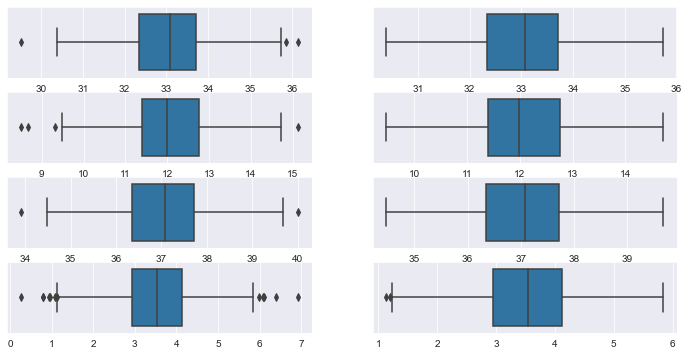

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(4,2,1)
sns.boxplot([i for i in df.iloc[:,3]])
plt.subplot(4,2,2)
sns.boxplot(Avg_Session_Length)
plt.subplot(4,2,3)
sns.boxplot([i for i in df.iloc[:,4]])
plt.subplot(4,2,4)
sns.boxplot(Time_on_App)
plt.subplot(4,2,5)
sns.boxplot([i for i in df.iloc[:,5]])
plt.subplot(4,2,6)
sns.boxplot(Time_on_Website)
plt.subplot(4,2,7)
sns.boxplot([i for i in df.iloc[:,6]])
plt.subplot(4,2,8)
sns.boxplot(Length_of_Membership)
print(  "   Before outliers                                          " ,end=" ")
print('After removing outliers')

In [22]:
df2=pd.DataFrame({'Time_on_Website':Time_on_Website})
df2['Avg_Session_Length']=pd.Series(Avg_Session_Length)
df2['Time_on_App']=pd.Series(Time_on_App)
df2['Length_of_Membership']=pd.Series(Length_of_Membership)

In [23]:
df2.describe()

,Time_on_Website,Avg_Session_Length,Time_on_App,Length_of_Membership
count,498.000000,497.000000,496.000000,488.000000
mean,37.060851,33.048419,12.065775,3.543560
std,0.993895,0.964901,0.955793,0.916065
min,34.476878,30.393185,9.477778,1.139094
25%,36.353186,32.342796,11.393568,2.956254
50%,37.069367,33.078717,11.995167,3.535445
75%,37.715117,33.708153,12.753850,4.118402
max,39.672591,35.742670,14.715388,5.840506


# Performing the model

In [24]:
X=df.iloc[:,3:7]

In [25]:
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [26]:
Y=df.iloc[:,-1]
Y.shape

(500,)

In [27]:
X.shape

(500, 4)

In [28]:
Y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [29]:
Y.shape

(500,)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.20, random_state=42)


In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 4)
(100, 4)
(400,)
(100,)


In [53]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
regresor=reg.fit(X_train,y_train)
y_pred=regresor.predict(X_test)

print(regresor.coef_)


[25.5962591  38.78534598  0.31038593 61.89682859]


In [34]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [35]:
regresor.score(X_train,y_train)

0.9854240629700333

In [36]:
print('mae',mean_absolute_error(y_pred,y_test))
print('mse',mean_squared_error(y_pred,y_test))
print('rmse',np.sqrt(mean_squared_error(y_pred,y_test)))

mae 8.558441885315233
mse 109.86374118393988
rmse 10.48159058463647


In [38]:
X_test.shape

(100, 4)

In [39]:
r2=r2_score(y_pred,y_test)
r2

0.9782625350414405

In [40]:
Adjusted_r2_score=1-((1-r2)*(100-1))/(100-1-4)
Adjusted_r2_score

0.9773472733589748

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
cross_val_score=cross_val_score(regresor, X, Y, cv=10)

In [43]:
cross_val_score.mean()

0.9825492707486994

In [44]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train,y_train)


Ridge()

In [45]:
r_pred=clf.predict(X_test)

In [46]:
r2_score(r_pred,y_test)

0.9782424299312423

In [47]:
print('mae',mean_absolute_error(r_pred,y_test))
print('mse',mean_squared_error(r_pred,y_test))
print('rmse',np.sqrt(mean_squared_error(r_pred,y_test)))

mae 8.539230754571278
mse 109.45504392646647
rmse 10.462076463420944


In [48]:
from sklearn import linear_model
li=[]
for i in [1,2,7,9,15]:
    alpha=i
    loa=linear_model.Lasso(alpha=i)
    loa.fit(X_train,y_train)
    ylpred=loa.predict(X_test)
    Cloa =loa.coef_
    li.append(Cloa)
    print(r2_score(y_test,ylpred))

0.9776634203062273
0.9765116640710505
0.9543306714228227
0.9377945692115652
0.8619106901061492


In [49]:
li

[array([24.57367356, 37.82407373,  0.        , 61.01564656]),
 array([23.54820389, 36.83691418,  0.        , 60.14901621]),
 array([18.42091194, 31.90114203,  0.        , 55.81586137]),
 array([16.36999766, 29.92683431,  0.        , 54.08259929]),
 array([10.21725482, 24.00391114,  0.        , 48.88281307])]

In [50]:
#As we can see if we increase the alpa value our model starts underfitting or 
#we can say our byes is increase and varience is reducing

#coefficient also decreasing 

## MAIN CONCLUSION

In [62]:
cdf=pd.DataFrame(regresor.coef_,X.columns,columns=['coeff'])

In [63]:
cdf

,coeff
Avg. Session Length,25.596259
Time on App,38.785346
Time on Website,0.310386
Length of Membership,61.896829


In [64]:
#if we hold all the feature fixed and 1 unit incerease in Time on app 
#this will equal to  38.7 increase in your target value
#same if  we increase 1unit time on website by keeping all feature fixed 
#this will increase in 0.3%

#So from this model we would like to suggest the company to focused on 
#there App rather then there website